Lasso Score :  0.432544377941
Linear Regression Score :  0.625847340396
SVR Score :  0.666575155697
Ridge Score :  0.625835759112
Bayes-Ridge Score :  0.625655412472
Train Score = 0.7012
Test Score = 0.8235
MSE train: 3.6122
MSE test: 1.8146
                Feature  Coefficient
0                     1       0.0000
1           Temperatura      -1.9862
2               Pressão       1.3456
3                    Na       1.3253
4                    Cl      -0.1470
5                    Ca       0.9613
6                    Mg      -0.2730
7                     K      -0.9251
8                   SO4      -0.3484
9         Temperatura^2      -0.3494
10  Temperatura Pressão       0.1207
11       Temperatura Na      -0.4023
12       Temperatura Cl       0.5830
13       Temperatura Ca      -0.4043
14       Temperatura Mg       0.2062
15        Temperatura K       0.0881
16      Temperatura SO4       0.4944
17            Pressão^2      -0.3970
18           Pressão Na       0.0899
19           Press

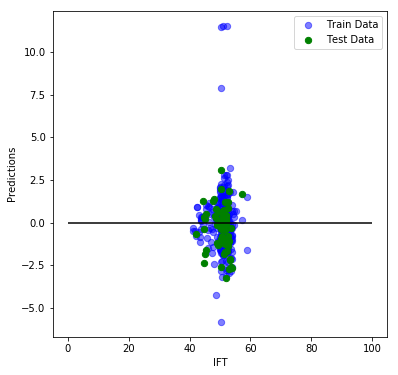



-----------
Best Scores
-----------
  Mean Score for train data with Linear Regression Model with CV = 15:    0.7440
   Mean Score for test data with Linear Regression Model with CV = 15:    0.6754


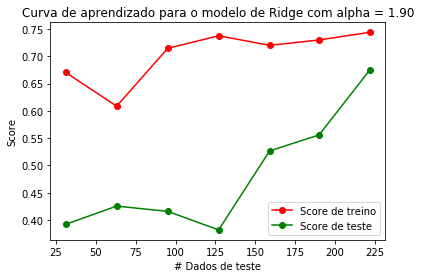

In [7]:
#Import Packages
import pandas as pd
import sklearn.linear_model as lm
import sklearn.preprocessing as pp
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn import metrics,model_selection
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
import numpy as np
import math
import seaborn as sns
import warnings
from sklearn import svm
%matplotlib inline
warnings.filterwarnings('ignore')

## Grab data for ML
data = pd.read_csv("dataset-ift-interface.csv", delimiter=",")
# Input Matrix
X = data[["Temperatura","Pressão","Na","Cl","Ca","Mg","K","SO4"]]
# Output Vector
y = data['IFT']
X_copy = X
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#X_train[X_train.columns] = pp.StandardScaler().fit_transform(X_train[X_train.columns])
#X_train = PolynomialFeatures(degree=3).fit_transform(X_train)
#X_test[X_test.columns] = pp.StandardScaler().fit_transform(X_test[X_test.columns])
#X_test = PolynomialFeatures(degree=3).fit_transform(X_test)
poly = PolynomialFeatures(degree=2)
X[X.columns] = pp.StandardScaler().fit_transform(X[X.columns])
df = poly.fit_transform(X)

cols = poly.get_feature_names(X.columns)
#print (cols)
#df1 = pd.DataFrame(X, index=poly.get_feature_names(X), columns=X.columns)
#print (df.head())


# Inserting new features
#X.insert(0,"Temp^2",X["Temperature"]*X["Temperature"])
#X.insert(0,'Ca^2',X["Ca"]*X["Ca"])
#X.insert(0,'K^2',X["K"]*X["K"])
#X.insert(0,'Mg^2',X["Mg"]*X["Mg"])
#X.insert(0,'SO4^2',X["SO4"]*X["SO4"])
#X.insert(0,'NaCl',X["Na"]*X["Cl"])
#X.insert(0,'NaCl^2',(X["Na"]*X["Cl"]**2))
#X.insert(0,'PT',(X["Pressure"]*X["Temperature"]))
#X.insert(0,'T^3',(X["Temperature"]*X["Temperature"]*X["Temperature"]))
#X[X.get_feature_names()] = pp.StandardScaler().fit_transform(X.get_feature_names())
#X = pp.scale(X)

#print (X.mean())
#print (df_poly.head())
## Testing Models
# Define size of train and test data
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Test Model: Lasso
model = lm.Lasso()
model.fit(X, y)
print ("Lasso Score : ", model.score(X,y))
#Test Model: Linear Regression
model = lm.LinearRegression()
model.fit(X, y)
print ("Linear Regression Score : ", model.score(X,y))
# Test Model: SVR
model = svm.SVR()
model.fit(X, y)
print ("SVR Score : ", model.score(X,y))
# Test Model: Ridge
model = lm.Ridge()
model.fit(X, y)
print ("Ridge Score : ", model.score(X,y))
# Test Model: Bayes-Ridge
model = lm.BayesianRidge()
model.fit(X, y)
print ("Bayes-Ridge Score : ", model.score(X,y))

#### LinearRegression
model = lm.Ridge(alpha=1.9)
model.fit(df, y)
#print (model.intercept_)
#print (len(model.coef_))
df_new = pd.DataFrame(df, columns = cols)

df_train = pd.DataFrame(list(zip(df_new.columns,model.coef_)), columns = ['Feature','Coefficient'])

X_train,X_test,y_train,y_test = train_test_split(df_new,y,test_size=0.2)
model.fit(X_train,y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
print ("Train Score = {:.4f}".format(model.score(X_train,y_train)))
print ("Test Score = {:.4f}".format( model.score(X_test,y_test)))
pd.options.display.float_format = '{:.4f}'.format
print ("MSE train: {:.4f}".format(np.mean((y_train - predict_train)**2)))
print ("MSE test: {:.4f}".format(np.mean((y_test - predict_test)**2)))
df_train = pd.DataFrame(list(zip(df_new.columns,model.coef_)), columns = ['Feature','Coefficient'])
print(df_train)

plt.figure(figsize=(6,6))
plt.scatter(predict_train, predict_train - y_train, c = 'b', s = 40, alpha='0.5', label='Train Data')
plt.scatter(predict_test, predict_test - y_test, c = 'g', s = 40, label = 'Test Data')
plt.legend()
plt.ylabel('Predictions')
plt.xlabel('IFT')
plt.hlines(y = 0, xmin = 0, xmax = 100)
plt.show()


# Learning Curve with Linear Regression
m = len(y)
model = lm.LinearRegression()
# Define train sizes
train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
train_sizes = [int(0.1*m),int(0.2*m),int(0.3*m),int(0.4*m),int(0.5*m),int(0.6*m),int(0.7*m)]
#for i in [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]:
#    model = lm.Ridge(alpha=i)
#    # Split data and calculate R²
#    train_sizes, train_scores, test_scores = learning_curve(model, df_new, y, scoring='r2', train_sizes=train_sizes, cv=4)
#    # Mean R² for train data
#    tsc = [i.mean() for i in train_scores ]
#    # Mean R² for test data
#    tsv = [i.mean() for i in test_scores ]
#    print ('CV: {0:.4f} => Training Score: {1:.4f} | Test Score: {2:10.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))

model = lm.Ridge(alpha=1.9)
train_sizes, train_scores, test_scores = learning_curve(model, df_new, y, scoring='r2', train_sizes=train_sizes, cv=4)
# Mean R² for train data
tsc = [i.mean() for i in train_scores ]
# Mean R² for test data
tsv = [i.mean() for i in test_scores ]
print("")
print("")
print("-----------")
print("Best Scores")
print("-----------")
print ("{:>70s} {:9.4f}".format('Mean Score for train data with Linear Regression Model with CV = 15:',tsc[6]))
print ("{:>70s} {:9.4f}".format("Mean Score for test data with Linear Regression Model with CV = 15:",tsv[6]))
plt.figure()
plt.title(("Curva de aprendizado para o modelo de Ridge com alpha = 1.90"))
plt.plot(train_sizes,tsc, 'o-', color="r", label="Score de treino")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Score de teste")
plt.xlabel("# Dados de teste")
plt.ylabel("Score")
plt.legend()
plt.show()

                Feature  Coefficient
0                     1       0.0000
1           Temperatura      -1.9862
2               Pressão       1.3456
3                    Na       1.3253
4                    Cl      -0.1470
5                    Ca       0.9613
6                    Mg      -0.2730
7                     K      -0.9251
8                   SO4      -0.3484
9         Temperatura^2      -0.3494
10  Temperatura Pressão       0.1207
11       Temperatura Na      -0.4023
12       Temperatura Cl       0.5830
13       Temperatura Ca      -0.4043
14       Temperatura Mg       0.2062
15        Temperatura K       0.0881
16      Temperatura SO4       0.4944
17            Pressão^2      -0.3970
18           Pressão Na       0.0899
19           Pressão Cl      -0.0312
20           Pressão Ca       0.1551
21           Pressão Mg      -0.0842
22            Pressão K       0.0925
23          Pressão SO4      -0.2111
24                 Na^2      -0.7515
25                Na Cl      -0.0783
26                Na Ca      -0.1757
27                Na Mg      -0.2979
28                 Na K      -1.0564
29               Na SO4       0.1108
30                 Cl^2       0.4692
31                Cl Ca      -1.1092
32                Cl Mg      -0.1601
33                 Cl K      -0.7176
34               Cl SO4       0.0294
35                 Ca^2       0.2744
36                Ca Mg      -0.0535
37                 Ca K      -0.0110
38               Ca SO4      -0.0045
39                 Mg^2       0.0288
40                 Mg K       0.0290
41               Mg SO4       0.0454
42                  K^2       0.0558
43                K SO4       0.1329
44                SO4^2       0.0193

$$IFT = \sum_{i=1}^{m}\sum_{k=1}^{n} \theta _{k} x_{i}$$

$$m = number of data; n = number of features$$

$$\theta_{k} = \sum_{i=1}^{n}\sum_{k=0}^{1} \theta _{i}^{k} \theta _{i} + \sum_{i=1}^{n}\sum_{j=1;j \neq i}^{n} \theta _{i} \theta _{j}$$

Weight Parameters

$$\theta = \begin{bmatrix} -2.3251 \\ 1.2591 \\ 1.5434 \\ -0.4592 \\ 1.0138 \\ -0.1877 \\ -0.7945 \\ -0.0725 \\ -0.1276 \\ 0.1645 \\ -0.5553 \\ 0.6516 \\ -0.2861 \\ 0.2907 \\ 0.4641 \\ 0.4085 \\ -0.4305 \\ -0.0461 \\ -0.1301 \\ 0.248 \\ 0.011 \\ 0.3367 \\ 0.0449 \\ -0.4204 \\ -0.5093 \\ -0.2202 \\ -0.4089 \\ -1.3105 \\ -0.1095 \\ 0.6729 \\ -0.9464 \\ -0.1315 \\ -0.9311 \\ 0.4368 \\ 0.2094 \\ -0.0842 \\ -0.065 \\ -0.0827 \\ 0.0248 \\ -0.0013 \\ 0.0448 \\ 0.0739 \\ 0.0889 \\ 0.0474 \\ \end{bmatrix}$$ 

--------------
Testing CV
--------------

CV:  4 => Training Score: 0.8055 | Test Score: -7074039298412620283904.0000 | Ratio: -0.0000
CV:  5 => Training Score: 0.7891 | Test Score: -1054.5525 | Ratio: -0.0007
CV:  6 => Training Score: 0.7820 | Test Score:  -945.1810 | Ratio: -0.0008
CV:  7 => Training Score: 0.7792 | Test Score: -1239.4559 | Ratio: -0.0006
CV:  8 => Training Score: 0.7848 | Test Score: -1332.7581 | Ratio: -0.0006
CV:  9 => Training Score: 0.7803 | Test Score: -25722.7833 | Ratio: -0.0000
CV: 10 => Training Score: 0.7792 | Test Score: -22596.4050 | Ratio: -0.0000
CV: 11 => Training Score: 0.7779 | Test Score: -25839.2874 | Ratio: -0.0000
CV: 12 => Training Score: 0.7744 | Test Score: -259582143339256545804288.0000 | Ratio: -0.0000
CV: 13 => Training Score: 0.7785 | Test Score: -21205.9817 | Ratio: -0.0000
CV: 14 => Training Score: 0.7750 | Test Score: -9200.3440 | Ratio: -0.0001
CV: 15 => Training Score: 0.7765 | Test Score: -45842.8355 | Ratio: -0.0000
CV: 16 => Train

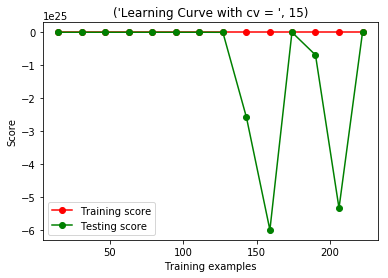

In [172]:
# Learning Curve with Linear Regression
m = len(y)
model = lm.LinearRegression()
# Define train sizes
train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
# Grab the best Cross-Validation tests
print("--------------")
print("Testing CV")
print("--------------")
print("")
for i in range(4,20):
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=i)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('CV: {0:2d} => Training Score: {1:.4f} | Test Score: {2:10.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=15)
# Mean R² for train data
tsc = [i.mean() for i in train_scores ]
# Mean R² for test data
tsv = [i.mean() for i in test_scores ]
print("")
print("")
print("-----------")
print("Best Scores")
print("-----------")
print ("{:>70s} {:9.4f}".format('Mean Score for train data with Linear Regression Model with CV = 15:',tsc[13]))
print ("{:>70s} {:9.4f}".format("Mean Score for test data with Linear Regression Model with CV = 15:",tsv[13]))
plt.figure()
plt.title(("Learning Curve with cv = ", 15))
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Testing score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()

--------------
Testing CV
--------------

CV:  4 => Training Score: 0.4497 | Test Score: 0.4211 | Ratio: 1.0678
CV:  5 => Training Score: 0.4540 | Test Score: 0.4175 | Ratio: 1.0874
CV:  6 => Training Score: 0.4459 | Test Score: 0.4066 | Ratio: 1.0968
CV:  7 => Training Score: 0.4489 | Test Score: 0.4072 | Ratio: 1.1025
CV:  8 => Training Score: 0.4568 | Test Score: 0.4253 | Ratio: 1.0742
CV:  9 => Training Score: 0.4600 | Test Score: 0.4349 | Ratio: 1.0576
CV: 10 => Training Score: 0.4575 | Test Score: 0.4084 | Ratio: 1.1202
CV: 11 => Training Score: 0.4597 | Test Score: 0.4195 | Ratio: 1.0957
CV: 12 => Training Score: 0.4656 | Test Score: 0.4172 | Ratio: 1.1160
CV: 13 => Training Score: 0.4736 | Test Score: 0.3996 | Ratio: 1.1850
CV: 14 => Training Score: 0.4666 | Test Score: 0.4127 | Ratio: 1.1305
CV: 15 => Training Score: 0.4725 | Test Score: 0.4339 | Ratio: 1.0890
CV: 16 => Training Score: 0.4721 | Test Score: 0.4262 | Ratio: 1.1078
CV: 17 => Training Score: 0.4721 | Test Score: 0

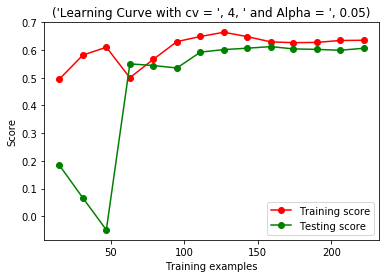

In [37]:
# Learning Curve with Lasso model
m = len(y)
model = lm.Lasso(max_iter=10000000)
# Define train sizes
train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
# Grab the best Cross-Validation tests
print("--------------")
print("Testing CV")
print("--------------")
print("")
for i in range(4,20):
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=i)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('CV: {0:2d} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
print("--------------")
print("Testing Alphas")
print("--------------")
print("")
for i in [0.005,0.006,0.007,0.008,0.009,0.010,0.011,0.012,0.013,0.014,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,]:
    model = lm.Lasso(alpha=i,max_iter=10000000)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Alpha: {0:.3f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
model = lm.Lasso(alpha=0.05,max_iter=10000000)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
# Mean R² for train data
tsc = [i.mean() for i in train_scores ]
# Mean R² for test data
tsv = [i.mean() for i in test_scores ]

print("")
print("")
print("-----------")
print("Best Scores")
print("-----------")
print ("{:>80s} {:9.4f}".format("Mean Score for train data with Lasso Model with CV = 4 and Alpha = 0.05:",tsc[13]))
print ("{:>80s} {:9.4f}".format("Mean Score for test data with Lasso Model with CV = 4 and Alpha = 0.05:",tsv[13]))
plt.figure()
plt.title(("Learning Curve with cv = ", 4, " and Alpha = ", 0.05))
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Testing score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()

--------------
Testing CV
--------------

CV:  4 => Training Score: 0.5863 | Test Score: 0.5557 | Ratio: 1.0550
CV:  5 => Training Score: 0.5805 | Test Score: -7.1770 | Ratio: -0.0809
CV:  6 => Training Score: 0.5751 | Test Score: -7.9516 | Ratio: -0.0723
CV:  7 => Training Score: 0.5768 | Test Score: -8.6058 | Ratio: -0.0670
CV:  8 => Training Score: 0.5818 | Test Score: -10.4421 | Ratio: -0.0557
CV:  9 => Training Score: 0.5816 | Test Score: -9.2943 | Ratio: -0.0626
CV: 10 => Training Score: 0.5808 | Test Score: -10.0017 | Ratio: -0.0581
CV: 11 => Training Score: 0.5809 | Test Score: 0.5343 | Ratio: 1.0873
CV: 12 => Training Score: 0.5865 | Test Score: -7.9772 | Ratio: -0.0735
CV: 13 => Training Score: 0.5875 | Test Score: -7.6090 | Ratio: -0.0772
CV: 14 => Training Score: 0.5835 | Test Score: -6.6420 | Ratio: -0.0879
CV: 15 => Training Score: 0.5923 | Test Score: -7.6891 | Ratio: -0.0770
CV: 16 => Training Score: 0.5912 | Test Score: -21.6255 | Ratio: -0.0273
CV: 17 => Training Scor

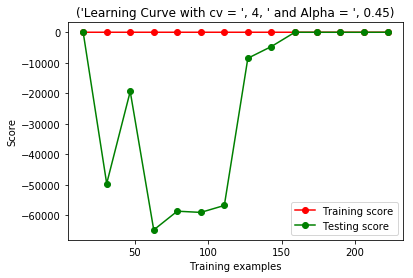

In [136]:
# Learning Curve with Ridge model
m = len(y)
model = lm.Ridge(max_iter=10000000,normalize='true')
# Define train sizes
train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
# Grab the best Cross-Validation tests
print("--------------")
print("Testing CV")
print("--------------")
print("")
for i in range(4,20):
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=i)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('CV: {0:2d} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
print("--------------")
print("Testing Alphas")
print("--------------")
print("")
for i in [0.000001,0.000005,0.00001,0.00005,0.0001,0.0005]:
    model = lm.Ridge(alpha=i,max_iter=10000000,normalize='true')
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Alpha: {0:.7f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))

    
model = lm.Ridge(alpha=1.9,max_iter=10000000,normalize='true')
train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
# Mean R² for train data
tsc = [i.mean() for i in train_scores ]
# Mean R² for test data
tsv = [i.mean() for i in test_scores ]

print("")
print("")
print("-----------")
print("Best Scores")
print("-----------")
print ("{:>80s} {:9.4f}".format("Mean Score for train data with Ridge Model with CV = 4 and Alpha = 0.45:",tsc[13]))
print ("{:>80s} {:9.4f}".format("Mean Score for test data with Ridge Model with CV = 4 and Alpha = 0.45:",tsv[13]))
plt.figure()
plt.title(("Learning Curve with cv = ", 4, " and Alpha = ", 0.45))
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Testing score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()

--------------
Testing CV
--------------

CV:  4 => Training Score: 0.6390 | Test Score: 0.6064 | Ratio: 1.0537
CV:  5 => Training Score: 0.6342 | Test Score: 0.3950 | Ratio: 1.6057
CV:  6 => Training Score: 0.6280 | Test Score: 0.4254 | Ratio: 1.4762
CV:  7 => Training Score: 0.6284 | Test Score: 0.3986 | Ratio: 1.5765
CV:  8 => Training Score: 0.6337 | Test Score: 0.3825 | Ratio: 1.6566
CV:  9 => Training Score: 0.6334 | Test Score: 0.4347 | Ratio: 1.4571
CV: 10 => Training Score: 0.6318 | Test Score: 0.4131 | Ratio: 1.5294
CV: 11 => Training Score: 0.6301 | Test Score: 0.5540 | Ratio: 1.1372
CV: 12 => Training Score: 0.6362 | Test Score: 0.3682 | Ratio: 1.7277
CV: 13 => Training Score: 0.6359 | Test Score: 0.3730 | Ratio: 1.7050
CV: 14 => Training Score: 0.6309 | Test Score: 0.4001 | Ratio: 1.5771
CV: 15 => Training Score: 0.6405 | Test Score: 0.4460 | Ratio: 1.4362
CV: 16 => Training Score: 0.6393 | Test Score: 0.2136 | Ratio: 2.9935
CV: 17 => Training Score: 0.6397 | Test Score: 0

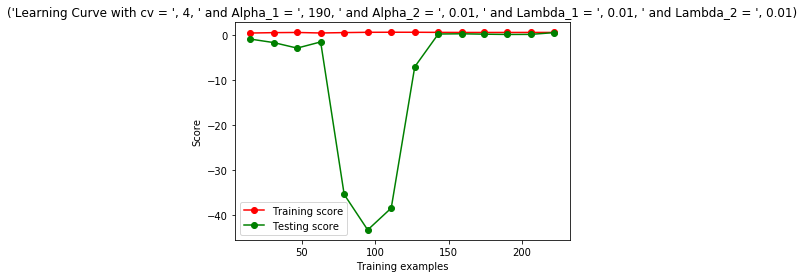

In [39]:
# Learning Curve with Bayes-Ridge model
m = len(y)
model = lm.BayesianRidge()
# Define train sizes
train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
# Grab the best Cross-Validation tests
print("--------------")
print("Testing CV")
print("--------------")
print("")
for i in range(4,20):
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=i)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('CV: {0:2d} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))

print("--------------")
print("Testing Alpha_1")
print("--------------")
print("")
for i in [100,110,120,130,140,150,160,170,180,190,200]:
    model = lm.BayesianRidge(alpha_1=i)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Alpha_1: {0:.4f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))


print("--------------")
print("Testing Alpha_2")
print("--------------")
print("")
for i in [0.1,0.01,0.02,0.03,0.04,0.05,0.06,0.07]:
    model = lm.BayesianRidge(alpha_1=190,alpha_2=i)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Alpha_2: {0:.4f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))


print("--------------")
print("Testing Lambda_1")
print("--------------")
print("")
for i in [0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07]:
    model = lm.BayesianRidge(alpha_1=190,alpha_2=0.01,lambda_1=i)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Lambda_1: {0:.4f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
print("--------------")
print("Testing Lambda_2")
print("--------------")
print("")
for i in [0.001,0.01,0.02,0.03,0.04,0.05,0.06,0.07]:
    model = lm.BayesianRidge(alpha_1=190,alpha_2=0.01,lambda_1=0.01,lambda_2=i)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Lambda_2: {0:.4f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
model = lm.BayesianRidge(alpha_1=190,alpha_2=0.01,lambda_1=0.01,lambda_2=0.01)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
# Mean R² for train data
tsc = [i.mean() for i in train_scores ]
# Mean R² for test data
tsv = [i.mean() for i in test_scores ]

print("")
print("")
print("-----------")
print("Best Scores")
print("-----------")
print ("{:>130s} {:9.4f}".format("Mean Score for train data with Bayes-Ridge Model with CV = 4 and Alpha1 = 190, Alpha2 = 0.01, Lambda1 = 0.01, Lambda2 = 0.01:",tsc[13]))
print ("{:>130s} {:9.4f}".format("Mean Score for test data with Bayes-Ridge Model with CV = 4 and Alpha1 = 190, Alpha2 = 0.01, Lambda1 = 0.01, Lambda2 = 0.01:",tsv[13]))
plt.figure()
plt.title(("Learning Curve with cv = ", 4, " and Alpha_1 = ", 190, " and Alpha_2 = ", 0.01, " and Lambda_1 = ", 0.01, " and Lambda_2 = ", 0.01))
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Testing score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()

--------------
Testing C
--------------

C:  1 => Training Score: 0.6280 | Test Score: 0.6008 | Ratio: 1.0451
C:  2 => Training Score: 0.6330 | Test Score: 0.6036 | Ratio: 1.0488
C:  3 => Training Score: 0.6321 | Test Score: 0.6024 | Ratio: 1.0493
C:  4 => Training Score: 0.6301 | Test Score: 0.5998 | Ratio: 1.0506
C:  5 => Training Score: 0.6300 | Test Score: 0.5996 | Ratio: 1.0507
C:  6 => Training Score: 0.6295 | Test Score: 0.6001 | Ratio: 1.0490
C:  7 => Training Score: 0.6289 | Test Score: 0.5988 | Ratio: 1.0503
C:  8 => Training Score: 0.6289 | Test Score: 0.5982 | Ratio: 1.0513
C:  9 => Training Score: 0.6289 | Test Score: 0.5992 | Ratio: 1.0496
C: 10 => Training Score: 0.6283 | Test Score: 0.5981 | Ratio: 1.0505
--------------
Testing Epsilon
--------------

Epsilon: 0.5000 => Training Score: 0.6330 | Test Score: 0.6045 | Ratio: 1.0471
Epsilon: 0.4000 => Training Score: 0.6325 | Test Score: 0.6044 | Ratio: 1.0464
Epsilon: 0.3000 => Training Score: 0.6338 | Test Score: 0.6054 |

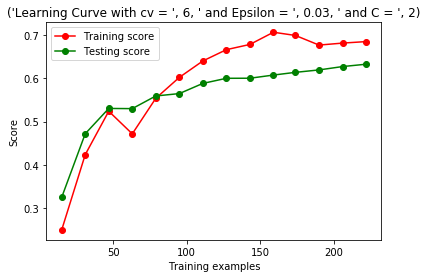

In [40]:
# Learning Curve with Bayes-Ridge model
m = len(y)

# Define train sizes
train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
# Grab the best Cross-Validation tests
print("--------------")
print("Testing C")
print("--------------")
print("")
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = svm.LinearSVR(C=i)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('C: {0:2d} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))

print("--------------")
print("Testing Epsilon")
print("--------------")
print("")
for i in [0.5,0.4,0.3,0.2,0.1,0.09,0.08,0.07,0.06,0.05,0.04,0.03,0.02,0.01]:
    model = svm.LinearSVR(C=2,epsilon=i)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('Epsilon: {0:.4f} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))
    
print("--------------")
print("Testing CV")
print("--------------")
print("")
for i in range(4,20):
    model = svm.LinearSVR(C=2,epsilon=0.03)
    # Split data and calculate R²
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=i)
    # Mean R² for train data
    tsc = [i.mean() for i in train_scores ]
    # Mean R² for test data
    tsv = [i.mean() for i in test_scores ]
    print ('CV: {0:2d} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))

model = svm.SVR(C=2,epsilon=0.03)
# Split data and calculate R²
train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=6)
# Mean R² for train data
tsc = [i.mean() for i in train_scores ]
# Mean R² for test data
tsv = [i.mean() for i in test_scores ]

print("")
print("")
print("-----------")
print("Best Scores")
print("-----------")
print ("{:>80s} {:9.4f}".format("Mean Score for train data with SVR Model with CV = 6, C = 2 and Epsilon = 0.03:",tsc[13]))
print ("{:>80s} {:9.4f}".format("Mean Score for test data with SVR Model with CV = 6, C = 2 and Epsilon = 0.03:",tsv[13]))
plt.figure()
plt.title(("Learning Curve with cv = ", 6, " and Epsilon = ", 0.03, " and C = ", 2))
plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
plt.plot(train_sizes,tsv, 'o-', color="g", label="Testing score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend()
plt.show()

In [427]:
# Model, Train Score, Test Score
#SVR = [0.824532326196, 0.646346021727]
#Bayes-Ridge = [0.829643239114,0.78661729108]
#Ridge = [0.836762422737,0.791320728026]
#Lasso = [0.824397748926,0.787773927972]
#Linear_Regression = [0.853792932936,-21.0647349189]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = lm.Ridge(alpha=0.45,max_iter=10000000)
model.fit(X_train,y_train)
print (model.score(X_test,y_test))
print (model.coef_)
print (model.intercept_)
print ("Best Model: Ridge with CV = 4 and Alpha = 0.45")
print("")
print ('Bayes-Ridge Score: {:.4f}'.format(0.908614001731))
print("")

0.652797379208
[  1.27902800e-01   9.84196599e-01   1.72142325e+00  -1.88303143e-02
  -1.81219691e-04   4.70145674e-02   5.30879998e-03   5.27406006e-01
  -3.47987535e-01   9.39011174e-01  -1.60030555e+00  -4.46483137e+00
  -1.20462827e+00]
53.5381484291
Best Model: Ridge with CV = 4 and Alpha = 0.45

Bayes-Ridge Score: 0.9086



%$$h(\theta) = \theta_{0} x_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + \theta_{3} x_{3} + \theta_{4} x_{4} + \theta_{5} x_{5} + \theta_{6} x_{6} + \theta_{7} x_{7} + \theta_{8} x_{8} + \theta_{9} x_{9} + \theta_{10} x_{10} + \theta_{11} x_{11} + \theta_{12} x_{12} + \theta_{13} x_{13} + \theta_{14} x_{14}$$


$$h(\theta) = \sum_{i=0}^{14} \theta_{i}x_{i}$$

$$min_{\theta} \left \| X \theta \right \|_{2}^{2} + \alpha \left \| \theta \right \|_{2}^{2}$$

Weight Parameters

$$\theta = \begin{bmatrix} 0 \\ -3.8656 \\ -0.802 \\ -5.1024 \\ 7.5791 \\ 6.3532 \\ 30.3196 \\ 5.7489 \\ -20.3095 \\ -0.2111 \\ 0.0758 \\ -1.091 \\ 1.4728 \\ -1.8098 \\ -21.5709 \\ 4.8338 \\ -0.6779 \\ -0.4105 \\ -1.2616 \\ 1.6971 \\ -2.4021 \\ -30.4947 \\ 6.6672 \\ 1.1831 \\ 7.3319 \\ -10.7457 \\ 16.2901 \\ -28.7159 \\ -47.8008 \\ -17.9368 \\ 1.0423 \\ -3.2047 \\ 102.9006 \\ 31.5946 \\ -26.5121 \\ 1.0021 \\ -8.2256 \\ -6.4947 \\ 12.6969 \\ -10.2338 \\ -1.7704 \\ 87.6263 \\ -3.1872 \\ 29.095 \\ 2.7589 \\  \end{bmatrix}$$ 

$h(\theta) = IFT$

$$IFT =  0.19243  * T - 0.00037 * T^{2} + 0.00486 * P + 0.48604 * [Na^{+}] - 0.10396 * [Cl^{-}] - 0.22542 *  [Ca^{2+}] - 0.57733 * [Mg^{2+}] - 2.86101 * [K^{+}] + 0.21858 * [SO_{4}^{2-}] + 0.72820 * [Ca^{2+}]^{2} + 0.76691 * [Mg^{2+}]^{2} + 1.38401 * [K^{+}]^{2} - 0.00480  * [SO_{4}^{2-}]^{2} + 59.12908$$

0.603518737373
0.554394923623
Cross-validated scores: [ 0.45711506  0.41819171  0.8258164   0.68052321  0.8540967   0.38527951
  0.37592636  0.63606016]
0.578987472551


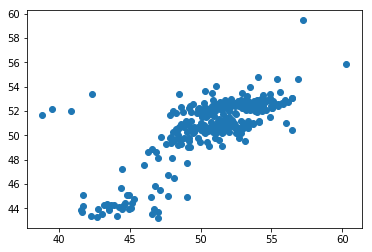

In [132]:
import sklearn.neural_network as nn
from sklearn.neural_network import MLPRegressor
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

train_sizes = [int(0.05*m),int(0.1*m),int(0.15*m),int(0.2*m),int(0.25*m),int(0.3*m),int(0.35*m),int(0.4*m),int(0.45*m),int(0.5*m),int(0.55*m),int(0.6*m),int(0.65*m),int(0.7*m)]
#for j in [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10]:
#    tsc = []
#    for i in range(50):
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = nn.MLPRegressor(alpha=0.00001,hidden_layer_sizes=(400,),activation='logistic',tol=0.05,solver='lbfgs',learning_rate='adaptive',max_iter=1000000)
model.fit(X,y)
#print (model.predict(X))
print (model.score(X,y))
scores = cross_val_score(model, X, y, cv=8)
model.fit(X,predictions)
#print (model.predict(X))
print (model.score(X,y))

#print (model.score(X,y))
print ("Cross-validated scores:", scores)

# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=4)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print (accuracy)

#        model.fit(X_train,y_train)
#        tsc.append(model.score(X_test,y_test))
       #print (model.score(X_test,y_test))
    
    #print ("Mean = ", sum(tsc) / float(len(tsc)))

#for i in range(3,20):
#    train_sizes, train_scores, test_scores = learning_curve(model, X, y, scoring='r2', train_sizes=train_sizes, cv=4)#

    ## Mean R² for train data
    #tsc = [i.mean() for i in train_scores ]
    ## Mean R² for test data
    #tsv = [i.mean() for i in test_scores ]
    #print ('CV: {0:2d} => Training Score: {1:.4f} | Test Score: {2:.4f} | Ratio: {3:.4f}'.format(i,tsc[13],tsv[13],(tsc[13]/tsv[13])))

#plt.figure()
#plt.title(("Learning Curve with cv = ", 6, " and Epsilon = ", 0.03, " and C = ", 2))
#plt.plot(train_sizes,tsc, 'o-', color="r", label="Training score")
#plt.plot(train_sizes,tsv, 'o-', color="g", label="Testing score")
#plt.xlabel("Training examples")
#plt.ylabel("Score")
#plt.legend()
#plt.show()

In [147]:
for j in [1e-6,5e-6,1e-5,5e-5,1e-4,5e-4]:
    model = lm.Ridge(alpha=j)
    model.fit(X,y)
    print (model.score(X,y))

for j in range(3,12):
    model = lm.Ridge(alpha=1e-6)
    scores = cross_val_score(model, X, y, cv=j)
    print ("Mean = ", sum(scores) / float(len(scores)))
    
    print ("Cross-validated scores:", scores)

0.696989367969
0.696988851003
0.696987619315
0.696975203657
0.696965554624
0.696948439118
Mean =  -3.7989546144
Cross-validated scores: [ 0.50319637 -3.75448192 -8.1455783 ]
Mean =  0.601426645778
Cross-validated scores: [ 0.34856556  0.83716978  0.62637375  0.59359749]
Mean =  0.595979644262
Cross-validated scores: [ 0.23357747  0.84472127  0.83875258  0.4852669   0.57758   ]
Mean =  -2.40171393914
Cross-validated scores: [  0.47962491   0.33147859   0.81381035   0.87282315 -17.47117314
   0.5631525 ]
Mean =  0.547954023888
Cross-validated scores: [ 0.4672074   0.25323785  0.78520252  0.87757292  0.56966379  0.33949577
  0.54329791]
Mean =  0.556727171879
Cross-validated scores: [ 0.48549796  0.00974558  0.83142403  0.83164734  0.87054954  0.41119043
  0.58264539  0.43111712]
Mean =  0.574121515946
Cross-validated scores: [ 0.40459757  0.04288882  0.83229598  0.78441783  0.86937363  0.8467139
  0.33281672  0.6412615   0.41272771]
Mean =  0.55399648054
Cross-validated scores: [ 0.41986